# Astral Projector - Python Neural Network Classifier

---

## Background

The Sloan Digital Sky Survey (SDSS) has created the most detailed three-dimensional maps of the Universe ever made, with deep multi-color images of one-third of the sky, and spectra for more than three million astronomical objects.

In the dataset, there are data from three classes of astrophysical objects: stars, galaxies, and quasars (QSO).   
The reduced Skyserver dataset consists of 10,000 observations of space taken by the SDSS. Every observation is described by 6 feature columns and 1 class column which identifies it to be either a star, galaxy, or quasar. 

The feature labels are u,g, r, i, z, and redshift. u,g, r, i, z represent the response of the 5 bands of the telescope. Each band selects out different colors (wavelengths) of light to get a different view of the cosmos. That is, these are different filters that focus on different wavelength bands. These are used in the Sloan Digital Sky Server to focus on the light of different wavelengths. This shows how the bands are split by wavelength:

The 6th feature is "redshift", which involves the Doppler Effect. This is what you hear when an emergency vehicle approaches: the siren sounds high-pitched, then after passing you, the siren sounds lower-pitched. While this effect is familiar with sound, it holds true for light as well! When objects move away from us the wave of light gets "stretched out". Thus the wavelength appears shifted towards red on the visible spectrum, so we say objects that are moving away from us are "red-shifted". 


So this redshift is a measure of how much the wavelength has been shifted. Because our Universe is expanding (the Big Bang!), almost all objects that we see in the night sky are moving away from us, and thus are red-shifted! One thing we can measure by looking at the light from distant objects is how much it has been red-shifted. It is observed that the farther an object is away from us, the more it is red-shifted. Or, things that are farther away are moving faster away from us! This is the famous Hubble's Law!


## First Look

Write a program that reads in the dataset skyserver.csv, Calculate the average and standard deviation for each feature and each class. Make a summary table of the following form. Make sure it is human-readable (it doesn't need lines or boxes, but needs reasonable spacing). **Also, how many entries are in this sample? How many of each class are there?**


In [120]:
# Name:   Jay Patel   Date:  10/24/22
# UserId: jrp9pte
# Comment easily out with cmd + /
# tab and shift tab for indenting
# 
# 

import numpy as np
import sys
import math
import matplotlib.pyplot as plt
import scipy  
import statistics
import pandas as pd 
import scipy.stats as ss
from scipy.stats import norm


#reading in the data
data = pd.read_csv("skyserver.csv") 
stars = data[data["class"]=="STAR"]
galaxies = data[data["class"]=="GALAXY"]
qso = data[data["class"]=="QSO"]
 # print(data) for looking at

print(f'| Class    |        u           |          g       |         r        |        i        |         z        |        redshift       |')
print(f'| Stars    | {stars["u"].mean():4.3f} +- {stars["u"].std():4.3f}    | {stars["g"].mean():4.3f} +- {stars["g"].std():4.3f}  | {stars["r"].mean():4.3f} +- {stars["r"].std():4.3f}  | {stars["i"].mean():4.3f} +- {stars["i"].std():4.3f} | {stars["z"].mean():4.3f} +- {stars["z"].std():4.3f}  | {stars["redshift"].mean():4.6f} +- {stars["redshift"].std():4.6f}  |')
print(f'| Galaxies | {galaxies["u"].mean():4.3f} +- {galaxies["u"].std():4.3f}    | {galaxies["g"].mean():4.3f} +- {galaxies["g"].std():4.3f}  | {galaxies["r"].mean():4.3f} +- {galaxies["r"].std():4.3f}  | {galaxies["i"].mean():4.3f} +- {galaxies["i"].std():4.3f} | {galaxies["z"].mean():4.3f} +- {galaxies["z"].std():4.3f}  | {galaxies["redshift"].mean():4.6f} +- {galaxies["redshift"].std():4.6f}  |')
print(f'| Quasars  | {qso["u"].mean():4.3f} +- {qso["u"].std():4.3f}    | {qso["g"].mean():4.3f} +- {qso["g"].std():4.3f}  | {qso["r"].mean():4.3f} +- {qso["r"].std():4.3f}  | {qso["i"].mean():4.3f} +- {qso["i"].std():4.3f} | {qso["z"].mean():4.3f} +- {qso["z"].std():4.3f}  | {qso["redshift"].mean():4.6f} +- {qso["redshift"].std():4.6f}  |')

print("")
print( f'There are {len(data)} rows(data entries) in this data set, {len(stars)} stars, {len(galaxies)} galaxies, and {len(qso)} quasars. ' )

print(data)



| Class    |        u           |          g       |         r        |        i        |         z        |        redshift       |
| Stars    | 18.330 +- 0.930    | 17.131 +- 0.988  | 16.732 +- 1.081  | 16.594 +- 1.152 | 16.531 +- 1.172  | 0.000043 +- 0.000410  |
| Galaxies | 18.804 +- 0.692    | 17.350 +- 0.757  | 16.650 +- 0.849  | 16.273 +- 0.886 | 16.018 +- 0.947  | 0.080325 +- 0.046036  |
| Quasars  | 18.943 +- 0.569    | 18.679 +- 0.615  | 18.499 +- 0.673  | 18.360 +- 0.720 | 18.275 +- 0.774  | 1.218366 +- 0.697699  |

There are 10000 rows(data entries) in this data set, 4152 stars, 4998 galaxies, and 850 quasars. 
       class         u         g         r         i         z  redshift
0       STAR  19.47406  17.04240  15.94699  15.50342  15.22531 -0.000009
1       STAR  18.66280  17.21449  16.67637  16.48922  16.39150 -0.000055
2     GALAXY  19.38298  18.19169  17.47428  17.08732  16.80125  0.123111
3       STAR  17.76536  16.60272  16.16116  15.98233  15.90438 -0.000111
4   

Put your narrative here

There are 10000 rows(data entries) in this data set in this data set, 4152 stars, 4998 galaxies, and 850 quasars. 


---

## b) Histograms
Make and plot a histogram for the "r band" feature. On the same axis, include the distributions for the 3 different classes, drawing each one in a different color, and include a legend. Remember the axis labels and a title!

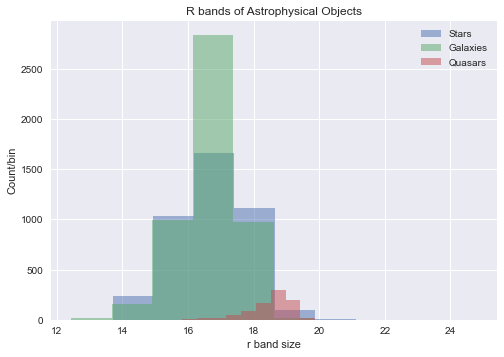

In [121]:


import numpy as np
import sys
import math
import matplotlib.pyplot as plt
import scipy  
import statistics
import pandas as pd 
import scipy.stats as ss
from scipy.stats import norm

#reading in the data
data = pd.read_csv("skyserver.csv") 
stars = data[data["class"]=="STAR"]
galaxies = data[data["class"]=="GALAXY"]
qso = data[data["class"]=="QSO"]


#plotting the data on the graph
plt.hist(stars["r"], label = "Stars", alpha= .5)
plt.hist(galaxies["r"] , label="Galaxies", alpha=.5)
plt.hist(qso["r"] , label="Quasars", alpha=.5)
plt.xlabel("r band size")
plt.ylabel("Count/bin")
plt.title("R bands of Astrophysical Objects")
plt.legend()
plt.show()

Put your narrative here

---

## c) Gaussian Fits
For the "r band" histograms above, fit the three distributions to a Gaussian function and extract the mean and sigma, as well as the uncertainty from the fits. Compare to the values in the first feature column on the table in part a.  **Are they close?**



The best fit parameters for the Star class r band are:     mu=16.8117+- 0.0265  sigma=1.131+- 0.0265    a=1.0140+- 0.0206  
The best fit parameters for the Galaxies class r band are: mu=16.8101+- 0.0206  sigma=0.7506+- 0.0206    a=0.9790+- 0.0233 
The best fit parameters for the Quesars class r band are:  mu=18.7444+- 0.0207  sigma=0.453+- 0.0209    a=0.9029+- 0.0358 


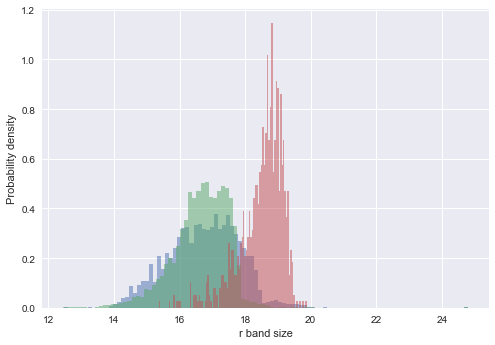

In [122]:
# Put your code here

import numpy as np
import sys
import math
import matplotlib.pyplot as plt
import scipy  
import statistics
import pandas as pd 
import scipy.stats as ss
from scipy.stats import norm

# loading in the data for the dataframe
data = pd.read_csv("skyserver.csv") 
stars = data[data["class"]=="STAR"]
galaxies = data[data["class"]=="GALAXY"]
qso = data[data["class"]=="QSO"]

gaus_func=lambda x, mu, sig, a : a*norm.pdf(x, loc=mu, scale=sig)   #the gaussian function

# plotting the data and getting the fit and its uncertainties for each class
bin_values, bins, myart = plt.hist(stars['r'] , 100, density=1, alpha=0.5, )
plt.xlabel("r band size")
plt.ylabel("Probability density")
centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = scipy.optimize.curve_fit(gaus_func, centers, bin_values, p0=[17,1,300])
mu_uncertainty=math.sqrt(cov[0,0])
sigma_uncertainty=math.sqrt(cov[1,1])
a_uncertainty=math.sqrt(cov[2,2])


bin_values2, bins2, myart2 = plt.hist(galaxies['r'] , 100, density=1, alpha=0.5, )
centers2 = (0.5*(bins2[1:]+bins2[:-1]))
pars2, cov2 = scipy.optimize.curve_fit(gaus_func, centers2, bin_values2, p0=[17,1,300])
mu_uncertainty2=math.sqrt(cov2[0,0])
sigma_uncertainty2=math.sqrt(cov2[1,1])
a_uncertainty2=math.sqrt(cov2[2,2])

bin_values3, bins3, myart3 = plt.hist(qso['r'] , 100, density=1, alpha=0.5, )
centers3 = (0.5*(bins3[1:]+bins3[:-1]))
pars3, cov3 = scipy.optimize.curve_fit(gaus_func, centers3, bin_values3, p0=[18,1,300])
mu_uncertainty3=math.sqrt(cov3[0,0])
sigma_uncertainty3=math.sqrt(cov3[1,1])
a_uncertainty3=math.sqrt(cov3[2,2])

print(f"\n\nThe best fit parameters for the Star class r band are:     mu={pars[0]:4.4f}+- {mu_uncertainty:4.4f}  sigma={pars[1]:4.4}+- {sigma_uncertainty:4.4f}    a={pars[2]:4.4f}+- {a_uncertainty:4.4f}  ")
print(f"The best fit parameters for the Galaxies class r band are: mu={pars2[0]:4.4f}+- {mu_uncertainty2:4.4f}  sigma={pars2[1]:4.4}+- {sigma_uncertainty2:4.4f}    a={pars2[2]:4.4f}+- {a_uncertainty2:4.4f} ")
print(f"The best fit parameters for the Quesars class r band are:  mu={pars3[0]:4.4f}+- {mu_uncertainty3:4.4f}  sigma={pars3[1]:4.4}+- {sigma_uncertainty3:4.4f}    a={pars3[2]:4.4f}+- {a_uncertainty3:4.4f} ")
 
    

# | Class    |        u           |          g       |         r        |        i        |         z        |        redshift       |
# | Stars    | 18.330 +- 0.930    | 17.131 +- 0.988  | 16.732 +- 1.081  | 16.594 +- 1.152 | 16.531 +- 1.172  | 0.000043 +- 0.000410  |
# | Galaxies | 18.804 +- 0.692    | 17.350 +- 0.757  | 16.650 +- 0.849  | 16.273 +- 0.886 | 16.018 +- 0.947  | 0.080325 +- 0.046036  |
# | Quasars  | 18.943 +- 0.569    | 18.679 +- 0.615  | 18.499 +- 0.673  | 18.360 +- 0.720 | 18.275 +- 0.774  | 1.218366 +- 0.697699  |


### Put your narrative here

All of the redshift mu values from the fits for all the classes are essentially with the standard deviation of their actual values of the same class. This means that the fit is fairly good. Even when comparing the classes across other variables the values are very simular. The r band and g band are very close and would be hard to seperate. The u band values are probably different enough from their clases correspond r band for the stars and galaxies classes.  

---

## d) Plot Fit Results

Make three plots, or a single plot with 3 subfigures, and draw the "r band" histogram with its best fit Gaussian function. Print the fit values and uncertainties on the figure (title or with a label of some kind).

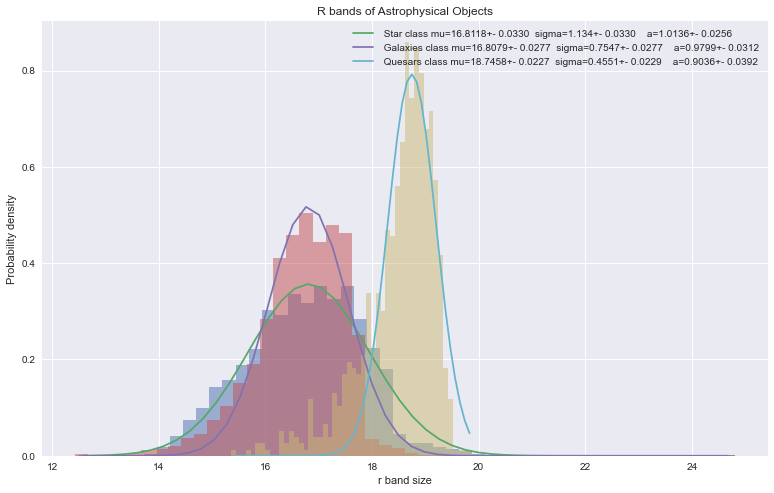



The best fit parameters for the Star class r band are:     mu=16.8118+- 0.0330  sigma=1.134+- 0.0330    a=1.0136+- 0.0256  
The best fit parameters for the Galaxies class r band are: mu=16.8079+- 0.0277  sigma=0.7547+- 0.0277    a=0.9799+- 0.0312 
The best fit parameters for the Quesars class r band are:  mu=18.7458+- 0.0227  sigma=0.4551+- 0.0229    a=0.9036+- 0.0392 


In [123]:
# Put your code here

import numpy as np
import sys
import math
import matplotlib.pyplot as plt
import scipy  
import statistics
import pandas as pd 
import scipy.stats as ss
from scipy.stats import norm

data = pd.read_csv("skyserver.csv") 

stars = data[data["class"]=="STAR"]
galaxies = data[data["class"]=="GALAXY"]
qso = data[data["class"]=="QSO"]


gaus_func=lambda x, mu, sig, a : a*norm.pdf(x, loc=mu, scale=sig)

bin_values, bins, myart = plt.hist(stars['r'] , 50, density=1, alpha=0.5, )
centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = scipy.optimize.curve_fit(gaus_func, centers, bin_values, p0=[17,1,300])
mu_uncertainty=math.sqrt(cov[0,0])
sigma_uncertainty=math.sqrt(cov[1,1])
a_uncertainty=math.sqrt(cov[2,2])
plt.plot(centers, gaus_func(centers,*pars), label=f' Star class mu={pars[0]:4.4f}+- {mu_uncertainty:4.4f}  sigma={pars[1]:4.4}+- {sigma_uncertainty:4.4f}    a={pars[2]:4.4f}+- {a_uncertainty:4.4f}  ') 


bin_values2, bins2, myart2 = plt.hist(galaxies['r'] , 50, density=1, alpha=0.5, )
centers2 = (0.5*(bins2[1:]+bins2[:-1]))
pars2, cov2 = scipy.optimize.curve_fit(gaus_func, centers2, bin_values2, p0=[17,1,300])
mu_uncertainty2=math.sqrt(cov2[0,0])
sigma_uncertainty2=math.sqrt(cov2[1,1])
a_uncertainty2=math.sqrt(cov2[2,2])
plt.plot(centers2, gaus_func(centers2,*pars2), label=f' Galaxies class mu={pars2[0]:4.4f}+- {mu_uncertainty2:4.4f}  sigma={pars2[1]:4.4}+- {sigma_uncertainty2:4.4f}    a={pars2[2]:4.4f}+- {a_uncertainty2:4.4f}') 

bin_values3, bins3, myart3 = plt.hist(qso['r'] , 50, density=1, alpha=0.5, )
centers3 = (0.5*(bins3[1:]+bins3[:-1]))
pars3, cov3 = scipy.optimize.curve_fit(gaus_func, centers3, bin_values3, p0=[18,1,300])
mu_uncertainty3=math.sqrt(cov3[0,0])
sigma_uncertainty3=math.sqrt(cov3[1,1])
a_uncertainty3=math.sqrt(cov3[2,2])
plt.plot(centers3, gaus_func(centers3,*pars3), label=f' Quesars class mu={pars3[0]:4.4f}+- {mu_uncertainty3:4.4f}  sigma={pars3[1]:4.4}+- {sigma_uncertainty3:4.4f}    a={pars3[2]:4.4f}+- {a_uncertainty3:4.4f}') 



plt.title("R bands of Astrophysical Objects")
plt.xlabel("r band size")
plt.ylabel("Probability density")
plt.legend()
my_fig = plt.gcf() #size figure
my_fig.set_size_inches(13,8)
plt.show()
          
          
print(f"\n\nThe best fit parameters for the Star class r band are:     mu={pars[0]:4.4f}+- {mu_uncertainty:4.4f}  sigma={pars[1]:4.4}+- {sigma_uncertainty:4.4f}    a={pars[2]:4.4f}+- {a_uncertainty:4.4f}  ")
print(f"The best fit parameters for the Galaxies class r band are: mu={pars2[0]:4.4f}+- {mu_uncertainty2:4.4f}  sigma={pars2[1]:4.4}+- {sigma_uncertainty2:4.4f}    a={pars2[2]:4.4f}+- {a_uncertainty2:4.4f} ")
print(f"The best fit parameters for the Quesars class r band are:  mu={pars3[0]:4.4f}+- {mu_uncertainty3:4.4f}  sigma={pars3[1]:4.4}+- {sigma_uncertainty3:4.4f}    a={pars3[2]:4.4f}+- {a_uncertainty3:4.4f} ")
 
    
  




Put your narrative here

---

## e) Fit Quality
For the fit for the Galaxy data from part d, assess the quality of the fit. Plot the pull distribution for the residuals. **Based on the pull distribution, does the Gaussian function describe the data well? Explain how you came to this conclusion. If the pull distribution was perfect, what would it look like? Hint: Use the statisitical uncertainty on each bin of the histogram.**

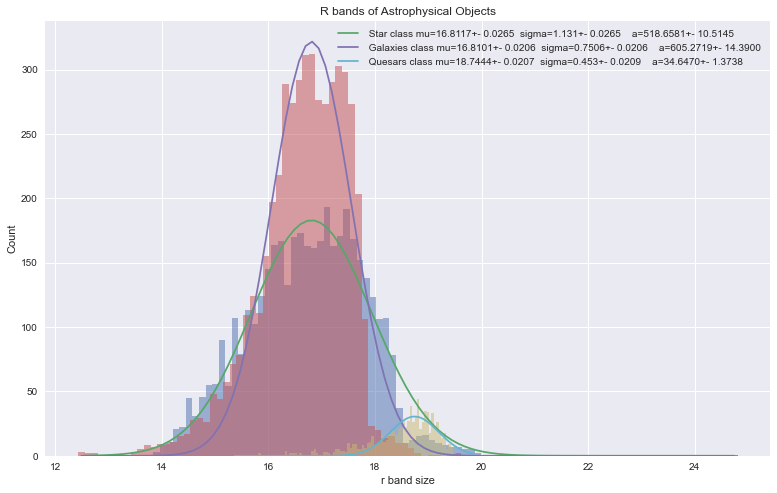



The best fit parameters for the Star class r band are:     mu=16.8117+- 0.0265  sigma=1.131+- 0.0265    a=518.6581+- 10.5145  
The best fit parameters for the Galaxies class r band are: mu=16.8101+- 0.0206  sigma=0.7506+- 0.0206    a=605.2719+- 14.3900 
The best fit parameters for the Quesars class r band are:  mu=18.7444+- 0.0207  sigma=0.453+- 0.0209    a=34.6470+- 1.3738 
100
100 98


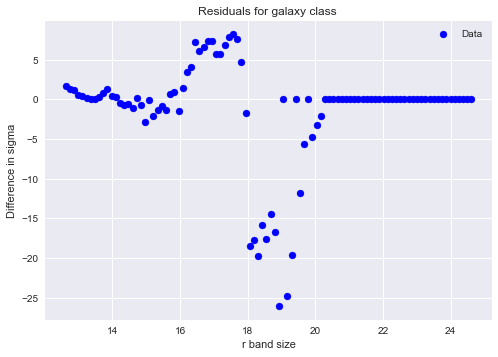



 The best fit parameters are of pull distribution : mu=-0.3053 +-0.4778  sigma=1.477+-0.2087 a=244.63




Text(0, 0.5, 'Count/bin')

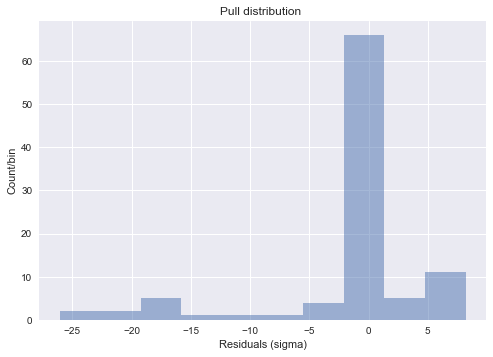

In [124]:
# Put your code here

import numpy as np
import sys
import math
import matplotlib.pyplot as plt
import scipy  
import statistics
import pandas as pd 
import scipy.stats as ss
from scipy.stats import norm

data = pd.read_csv("skyserver.csv") 

stars = data[data["class"]=="STAR"]
galaxies = data[data["class"]=="GALAXY"]
qso = data[data["class"]=="QSO"]


gaus_func=lambda x, mu, sig, a : a*norm.pdf(x, loc=mu, scale=sig)

bin_values, bins, myart = plt.hist(stars['r'] , 100, density= 0, alpha=0.5, )
centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = scipy.optimize.curve_fit(gaus_func, centers, bin_values, p0=[17,1,300])
mu_uncertainty=math.sqrt(cov[0,0])
sigma_uncertainty=math.sqrt(cov[1,1])
a_uncertainty=math.sqrt(cov[2,2])
plt.plot(centers, gaus_func(centers,*pars), label=f' Star class mu={pars[0]:4.4f}+- {mu_uncertainty:4.4f}  sigma={pars[1]:4.4}+- {sigma_uncertainty:4.4f}    a={pars[2]:4.4f}+- {a_uncertainty:4.4f}  ') 


bin_values2, bins2, myart2 = plt.hist(galaxies['r'] , 100, density=0, alpha=0.5, )
centers2 = (0.5*(bins2[1:]+bins2[:-1]))
pars2, cov2 = scipy.optimize.curve_fit(gaus_func, centers2, bin_values2, p0=[17,1,300])
mu_uncertainty2=math.sqrt(cov2[0,0])
sigma_uncertainty2=math.sqrt(cov2[1,1])
a_uncertainty2=math.sqrt(cov2[2,2])
plt.plot(centers2, gaus_func(centers2,*pars2), label=f' Galaxies class mu={pars2[0]:4.4f}+- {mu_uncertainty2:4.4f}  sigma={pars2[1]:4.4}+- {sigma_uncertainty2:4.4f}    a={pars2[2]:4.4f}+- {a_uncertainty2:4.4f}') 

bin_values3, bins3, myart3 = plt.hist(qso['r'] , 100, density=0, alpha=0.5, )
centers3 = (0.5*(bins3[1:]+bins3[:-1]))
pars3, cov3 = scipy.optimize.curve_fit(gaus_func, centers3, bin_values3, p0=[18,1,300])
mu_uncertainty3=math.sqrt(cov3[0,0])
sigma_uncertainty3=math.sqrt(cov3[1,1])
a_uncertainty3=math.sqrt(cov3[2,2])
plt.plot(centers3, gaus_func(centers3,*pars3), label=f' Quesars class mu={pars3[0]:4.4f}+- {mu_uncertainty3:4.4f}  sigma={pars3[1]:4.4}+- {sigma_uncertainty3:4.4f}    a={pars3[2]:4.4f}+- {a_uncertainty3:4.4f}') 


plt.title("R bands of Astrophysical Objects")
plt.xlabel("r band size")
plt.ylabel("Count")
plt.legend()
my_fig = plt.gcf() #size figure
my_fig.set_size_inches(13,8)
plt.show()
          
          
print(f"\n\nThe best fit parameters for the Star class r band are:     mu={pars[0]:4.4f}+- {mu_uncertainty:4.4f}  sigma={pars[1]:4.4}+- {sigma_uncertainty:4.4f}    a={pars[2]:4.4f}+- {a_uncertainty:4.4f}  ")
print(f"The best fit parameters for the Galaxies class r band are: mu={pars2[0]:4.4f}+- {mu_uncertainty2:4.4f}  sigma={pars2[1]:4.4}+- {sigma_uncertainty2:4.4f}    a={pars2[2]:4.4f}+- {a_uncertainty2:4.4f} ")
print(f"The best fit parameters for the Quesars class r band are:  mu={pars3[0]:4.4f}+- {mu_uncertainty3:4.4f}  sigma={pars3[1]:4.4}+- {sigma_uncertainty3:4.4f}    a={pars3[2]:4.4f}+- {a_uncertainty3:4.4f} ")
 

    
    
f_res=[]

print(len(bin_values2))

for i in range(len(bin_values2[1:-1])):
#     print(bin_values[i], "value")
    res=0
    if (bin_values2[i]>=1):  #Avoid divide by zero...
        res = (bin_values2[i]-gaus_func(centers2[i],*pars))/math.sqrt(bin_values2[i])

    f_res.append(res)
    #print(res,"\n")  #for troubleshooting

print(len(centers2),len(f_res))  #for troubleshooting
#x_res = np.linspace(-5, 5, num=98)

#Adding the residuals to graph and labels
plt.scatter(centers2[1:-1], f_res, label='Data',color='blue')
plt.title("Residuals for galaxy class ")
plt.xlabel("r band size")
plt.ylabel("Difference in sigma")
plt.legend()
plt.show()



bin_values, bins, myart = plt.hist(f_res, 10, alpha=0.5)
mu, sigma = scipy.stats.norm.fit(f_res)  #fit data to extract parameters

#Need to ignore the underflow and overlow bins
centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = scipy.optimize.curve_fit(gaus_func, centers, bin_values, p0=[0,1,20])
print(f"\n\n The best fit parameters are of pull distribution : mu={pars[0]:4.4f} +-{np.sqrt(cov[0,0]):.4f}  sigma={pars[1]:4.4}+-{np.sqrt(cov[1,1]):.4f} a={pars[2]:4.2f}\n\n")
# adding labels
plt.title("Pull distribution ")
plt.xlabel("Residuals (sigma)")
plt.ylabel("Count/bin") 




Put your narrative here
For the fit for the Galaxy data from part d, assess the quality of the fit. Plot the pull distribution for the residuals . **Based on the pull distribution, does the Gaussian function describe the data well? Explain how you came to this conclusion. If the pull distribution was perfect, what would it look like? Hint: Use the statisitical uncertainty on each bin of the histogram.**


The gaussian function does describe the data well. The residuals are fairly flate and the pull distribution represents a gaussion meaning there is little bias. A perfect pull distribution would be uniform at 0 meaning that all the data was at the best fit line and the residual was 0. This is not possible so a pull distrbtuion that is "even" and normal would be a guassion distrubition. This means that the line of best fit is not to low or high compared to the data, it lines up well. 

---

## f) Gaussian Classification

Based on the best-fit Gaussian functions that you found in part d, assess the discrimination power of classifying the sample based on selecting all of the events within 1-sigma of the Gaussian mean for each class. Try using the filtering methods used in class24.

**For each class: Assuming that the underlying distribution is the Gaussian model that you fit for in part d, what would be the fraction that the true class is predicted correctly (i.e. what fraction of the class is within 1-sigma of the mean of the distribution for that class)?**

**For each class: What would be the impurity fraction or percentage from each of the other two samples (i.e. what fraction or percentage of incorrect classifications from each of the other two classes would you select with this simple classification)?**

This information can be summarized concisely in a [confusion matrix](https://www.w3schools.com/python/python_ml_confusion_matrix.asp)  (we saw this in class24). Construct your own confusion matrix based on this selection and print it to the screen (just the numbers for the fractions are fine). **Provide a short explanation of the false positive and false negative values in the confusion matrix**.



1e-44 fraction of entries are within 1 sigma of the mean for the stars class and r band feature (Fraction that the true class is predicted correctly)
 1.0 fraction of entries are not within 1 sigma of the mean for the stars class and r band feature (Fraction that the true class is predicted incorrectly)
8.5e-99 fraction of entries are within 1 sigma of the mean for the galaxies class and r band feature (Fraction that the true class is predicted correctly)
 1.0 fraction of entries are not within 1 sigma of the mean for the galaxies class and r band feature (Fraction that the true class is predicted incorrectly)
 0.0 fraction of entries are within 1 sigma of the mean for the quasar class and r band feature (Fraction that the true class is predicted correctly)
 1.0 fraction of entries are not within 1 sigma of the mean for the quasar class and r band feature (Fraction that the true class is predicted incorrectly)


Confusion matrix
1.0293223840236294e-44 , 1.0
1.0 , 8.521673247927234e-99


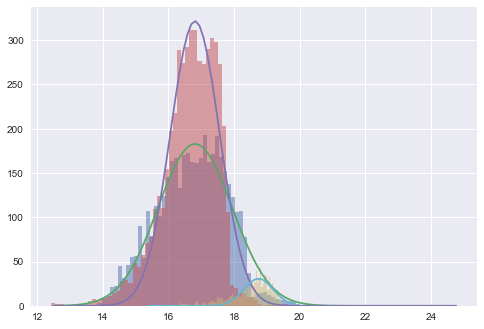

In [141]:
# Put your code here


import numpy as np
import sys
import math
import matplotlib.pyplot as plt
import scipy  
import statistics
import pandas as pd 
import scipy.stats as ss
from scipy.stats import norm

data = pd.read_csv("skyserver.csv") 

stars = data[data["class"]=="STAR"]
galaxies = data[data["class"]=="GALAXY"]
qso = data[data["class"]=="QSO"]


gaus_func=lambda x, mu, sig, a : a*norm.pdf(x, loc=mu, scale=sig)

bin_values, bins, myart = plt.hist(stars['r'] , 100, density= 0, alpha=0.5, )
centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = scipy.optimize.curve_fit(gaus_func, centers, bin_values, p0=[17,1,300])
mu_uncertainty=math.sqrt(cov[0,0])
sigma_uncertainty=math.sqrt(cov[1,1])
a_uncertainty=math.sqrt(cov[2,2])
plt.plot(centers, gaus_func(centers,*pars), label=f' Star class mu={pars[0]:4.4f}+- {mu_uncertainty:4.4f}  sigma={pars[1]:4.4}+- {sigma_uncertainty:4.4f}    a={pars[2]:4.4f}+- {a_uncertainty:4.4f}  ') 
# calculating the mean and sigma of the gaussian which we assume is true


# using cdf to find out the fraction of data in between one sigma on both sides of the mean
below1=ss.norm.cdf(1,pars[0],pars[1])
# print(below1)
below_minus_1=ss.norm.cdf(-1,pars[0],pars[1])
between_minus_1_and_1=below1-below_minus_1
print(f"{between_minus_1_and_1:4.2} fraction of entries are within 1 sigma of the mean for the stars class and r band feature (Fraction that the true class is predicted correctly)")
print(f"{ 1- between_minus_1_and_1:4.2} fraction of entries are not within 1 sigma of the mean for the stars class and r band feature (Fraction that the true class is predicted incorrectly)")



bin_values2, bins2, myart2 = plt.hist(galaxies['r'] , 100, density=0, alpha=0.5, )
centers2 = (0.5*(bins2[1:]+bins2[:-1]))
pars2, cov2 = scipy.optimize.curve_fit(gaus_func, centers2, bin_values2, p0=[17,1,300])
mu_uncertainty2=math.sqrt(cov2[0,0])
sigma_uncertainty2=math.sqrt(cov2[1,1])
a_uncertainty2=math.sqrt(cov2[2,2])
plt.plot(centers2, gaus_func(centers2,*pars2), label=f' Galaxies class mu={pars2[0]:4.4f}+- {mu_uncertainty2:4.4f}  sigma={pars2[1]:4.4}+- {sigma_uncertainty2:4.4f}    a={pars2[2]:4.4f}+- {a_uncertainty2:4.4f}') 
# calculating the mean and sigma of the gaussian which we assume is true


# using cdf to find out the fraction of data in between one sigma on both sides of the mean
below1_2=ss.norm.cdf(1,pars2[0],pars2[1])
below_minus_1_2=ss.norm.cdf(-1,pars2[0],pars2[1])
between_minus_1_and_1_2=below1_2-below_minus_1_2
print(f"{between_minus_1_and_1_2:4.2} fraction of entries are within 1 sigma of the mean for the galaxies class and r band feature (Fraction that the true class is predicted correctly)")
print(f"{1- between_minus_1_and_1_2:4.2} fraction of entries are not within 1 sigma of the mean for the galaxies class and r band feature (Fraction that the true class is predicted incorrectly)")


bin_values3, bins3, myart3 = plt.hist(qso['r'] , 100, density=0, alpha=0.5, )
centers3 = (0.5*(bins3[1:]+bins3[:-1]))
pars3, cov3 = scipy.optimize.curve_fit(gaus_func, centers3, bin_values3, p0=[18,1,300])
mu_uncertainty3=math.sqrt(cov3[0,0])
sigma_uncertainty3=math.sqrt(cov3[1,1])
a_uncertainty3=math.sqrt(cov3[2,2])
plt.plot(centers3, gaus_func(centers3,*pars3), label=f' Quesars class mu={pars3[0]:4.4f}+- {mu_uncertainty3:4.4f}  sigma={pars3[1]:4.4}+- {sigma_uncertainty3:4.4f}    a={pars3[2]:4.4f}+- {a_uncertainty3:4.4f}') 
# calculating the mean and sigma of the gaussian which we assume is true


# using cdf to find out the fraction of data in between one sigma on both sides of the mean
below1_3=ss.norm.cdf(1,pars3[0],pars3[1])
below_minus_1_3=ss.norm.cdf(-1,pars3[0],pars3[1])
between_minus_1_and_1_3=below1_3-below_minus_1_3
print(f"{between_minus_1_and_1_3:4.2} fraction of entries are within 1 sigma of the mean for the quasar class and r band feature (Fraction that the true class is predicted correctly)")
print(f"{1 - between_minus_1_and_1_3:4.2} fraction of entries are not within 1 sigma of the mean for the quasar class and r band feature (Fraction that the true class is predicted incorrectly)")

# something witn my cdf is off, but the general approach I think is right


#confusion matrix 
print("\n\nConfusion matrix")
print( between_minus_1_and_1, ",",  1 - between_minus_1_and_1  )
print(1- between_minus_1_and_1_2 ,",", between_minus_1_and_1_2  )
print(1- between_minus_1_and_1_3, ",", between_minus_1_and_1_3  )

Put your narrative here

### Bonus (+2)


Draw the confusion matrix you constructed in part f) using the Scikit-learn **ConfusionMatrixDisplay** function. 

In [126]:
#Put your bonus code here.  

---

## g) Pair Plot
Make the "pair plot" for the data. 


Text(0.5, 0.98, 'Pairplot for astrophysical objects')

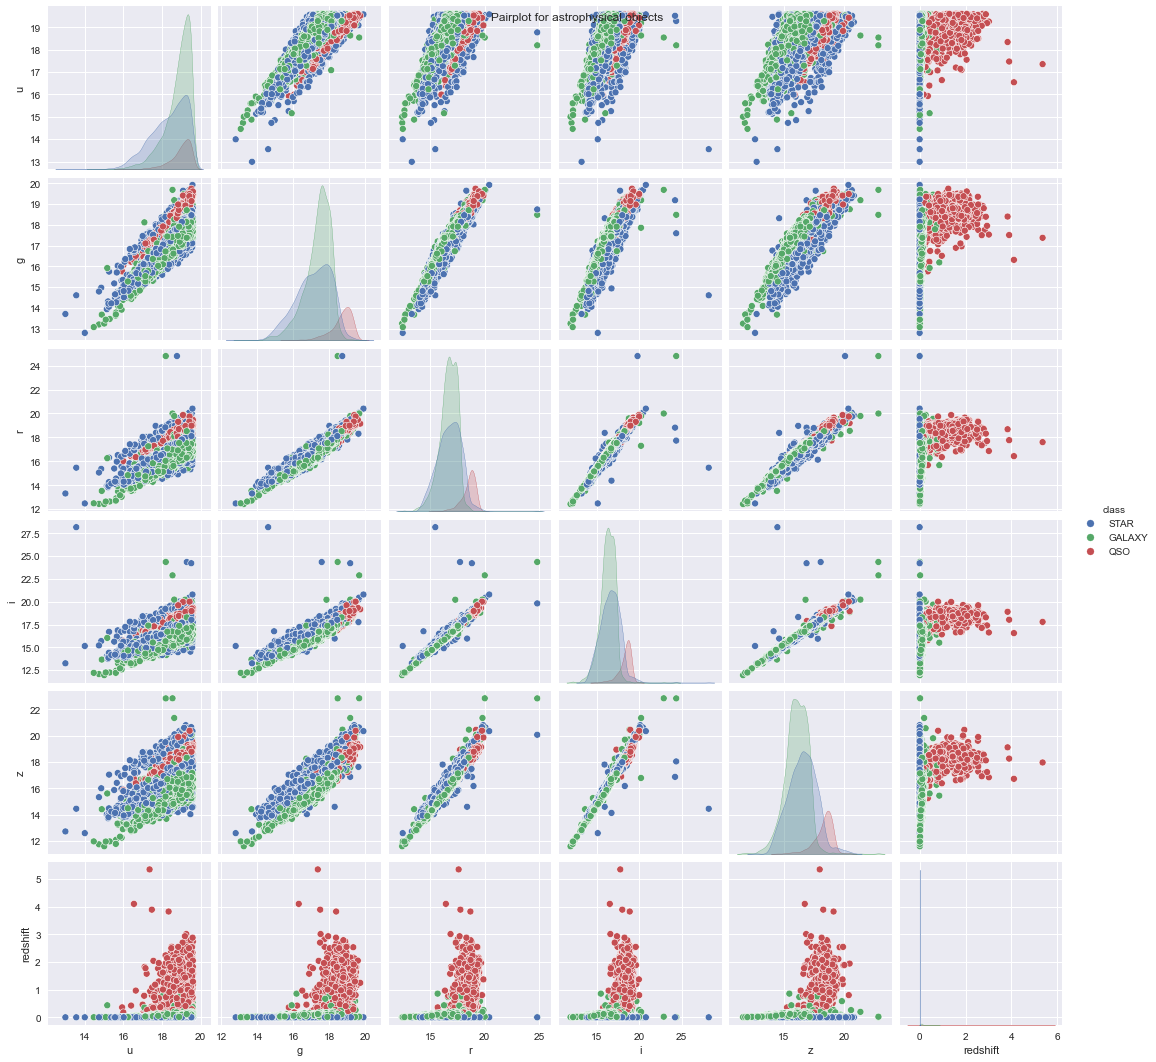

In [127]:
# Put your code here 
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
import scipy  
import statistics
import pandas as pd 
import scipy.stats as ss
from scipy.stats import norm
import seaborn as sns



# loading in data
data = pd.read_csv("skyserver.csv") 
stars = data[data["class"]=="STAR"]
galaxies = data[data["class"]=="GALAXY"]
qso = data[data["class"]=="QSO"]

data.sample(10)
plot = sns.pairplot(data, hue = "class") # one line of code in seaborn


plot.fig.suptitle("Pairplot for astrophysical objects") #Used seaborn to add titles

Put your narrative here

---

## h) Features for Classification

**Based on the pair plot, explain which features might be most useful in classification.**

Let's simplify the dataset into just two classes: star v/s galaxy. The Quasar (QSO) is pretty easy to identify, so let's not waste energy on that. Quasars are much farther away than observable stars and galaxies, so they have much higher redshifts. Anyway, use the loc method that we used in class24 notebook (to drop setosa) to remove the Quasars from the dataset.

Also, redshift information makes this problem too easy. We don't want that! Remove redshift from the dataset as well. Make the new pair plot. There, that should look much more challenging! 

I see some outliers in the pair plot. **You don't have to actually do it, but explain what kind of algorithm you might use to remove outliers. Why might it be important to clean up the dataset by removing outliers?**

Text(0.5, 0.98, 'Pairplot for astrophysical objects')

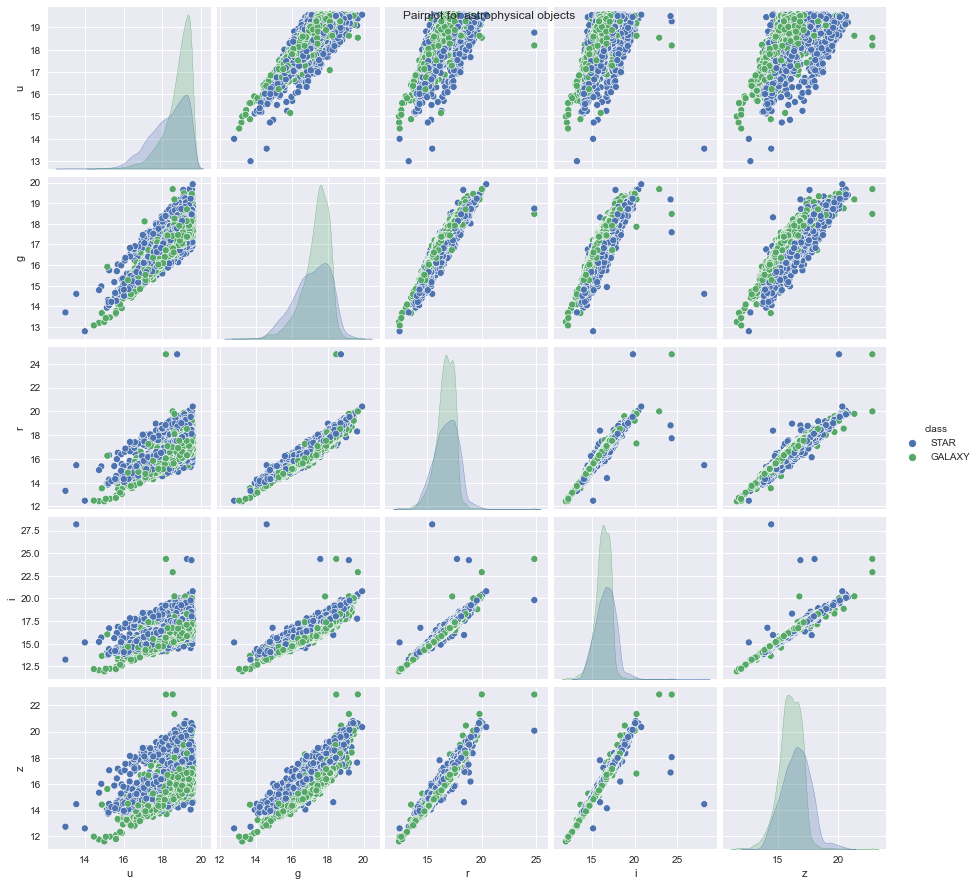

In [128]:
# Put your code here
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
import scipy  
import statistics
import pandas as pd 
import scipy.stats as ss
from scipy.stats import norm
import seaborn as sns



data = pd.read_csv("skyserver.csv") # reading in data

# droping the requested data
data_drop = data.loc[data["class"] != 'QSO']
data_clean = data_drop.drop('redshift', axis=1)
data_clean


plot2 = sns.pairplot(data_clean, hue="class") # creating pairplot

plot2.fig.suptitle("Pairplot for astrophysical objects") # addding title

Put your narrative here

The redshifts feature is obviously the most useful. The star class is around 0 whereas the other classes are all over. When comparing quesars if the redshift is above 0 it is very likly to be a quesar. Other than this feature the z band might be most useful as it seems like there is the least amount of cross over. It is hard to tell by just looking and for classification it is best to use all the classes as just using one or two it would be really hard to separate. There are alot of ways to remove outliers. I could go through and compare each datapoint with the mean and if it is multiple sigma away remove it. I could also just approximate more by removeing data points outside the guassian fit but this would make the data too easy and not as accurate. Removing outliers would make the traing dataset more likelky to produce accurate testings. Outliers are hard to accuratly classify and just mess up the training. 

---

## i) Training the Neural Network
Train a neural network to classify stars and galaxies using the reduced dataset that you made in part h. The question is, how well can you classify star v/s galaxy based on the 5 bands of light data from the SDSS? Play with the hyperparameters a little and see how it affects the accuracy_score to make sure you have a somewhat optimized network. Remember to scale data, since this is crucial in the MLP . **Show the farction of correctly classified samples.**

In [129]:
# Put your code here

import numpy as np
import sys
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy  
import statistics
import warnings
import pandas as pd 
import scipy.stats as ss
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

warnings.filterwarnings('ignore') # just to not be confused by warnings

data = pd.read_csv("skyserver.csv")
data_drop = data.loc[data["class"] != 'QSO']
data_drop = data_drop.drop('redshift', axis=1)
# loading in data

#Features Matrix

X_data = data_drop.drop('class', axis=1)
X_data.shape


#Target vector

y_data = data_drop['class']
y_data.shape


# Put your code here
#Split into the test/train samples
Xtrain, Xtest, ytrain, ytest = train_test_split(X_data, y_data, random_state=1)
print(X_data.shape, y_data.shape)
X_data.head()




# Using simple approach - the simple Naive Bayes Algorithm

model = GaussianNB()
model.fit(Xtrain, ytrain)

#use the model to predict the class of the test sample
y_model = model.predict(Xtest)

#Let's check the accuracy
accuracy_score(ytest, y_model)

#Using sophisticated scaling from class 24:

scaler = StandardScaler()  
# Don't cheat - fit only on training data!!!
scaler.fit(Xtrain)  
Xtrain = scaler.transform(Xtrain)  
# apply same transformation to test data!!!
Xtest = scaler.transform(Xtest) 
model = MLPClassifier(solver='lbfgs', alpha=10, hidden_layer_sizes=(5, 2), random_state=1)
model.fit(Xtrain, ytrain)

y_model = model.predict(Xtest)
#Let's check the accuracy
accuracy_score(ytest, y_model)

(9150, 5) (9150,)


0.9685314685314685

Put your narrative here
I am fairly accurate in the classification with a 96.9% accuracy. 

---

## j) Understanding your Neural Network classification performance

Plot the Confusion Matrix and **explain what it means**. Make the ROC curve and **explain what it means**. 


 confusion matrix for Test Set:
 [[1207   48]
 [  24 1009]] 




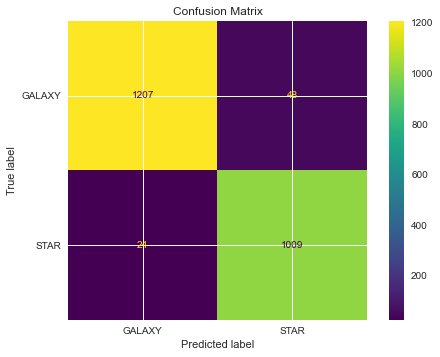

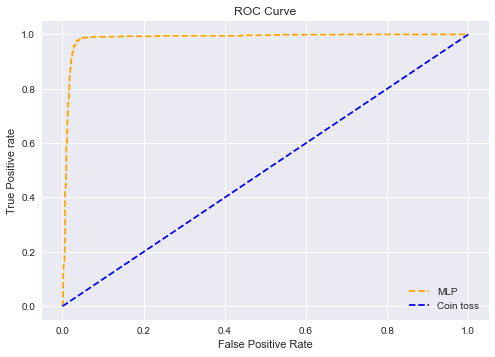

In [132]:
# Put your code here
print('\n confusion matrix for Test Set:\n',confusion_matrix(ytest,y_model),'\n\n')
# plotting confusion matrix
cm=confusion_matrix(ytest,y_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

ytest_bin=[]
for value in ytest: # classsifying as true positive or false psotive for roc curve
    clas =-1
    if value=="GALAXY":
        clas =0
    elif value=="STAR":
        clas=1
    else:
        pass
    ytest_bin.append(clas)

fpr2, tpr2, threshold = roc_curve(ytest_bin, model.predict_proba(Xtest)[:,1])
# roc curve for tpr = fpr - classifier with 50% prob of the right binary choice.  Flipping a coin.  
random_probs = [0 for i in range(len(ytest_bin))]
p_fpr, p_tpr, _ = roc_curve(ytest_bin, random_probs, pos_label=1)

plt.style.use('seaborn')

# ploting roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='MLP')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label="Coin toss")
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.title("ROC Curve")
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Put your narrative here

According to lecture: Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class. So, diagonal elements were predicted correctly, and non diagonal were predicted incorectly. Our model predicts 24 false galaxy and 48 false star labels. It basically makes it easy to see how many datapoints were classified correctly and what they were classified as. The roc curve is useful for telling how good the classfier is ( with true and false positive as the representation) compared to a coin toss. The farther away the classifiers curve from the curve from the coin toss means the more accurate and useful it is. A coin toss represents accuracry only half the time which represents the worst it could be without being absolute trash. 

---


Find the best set of hyperparameters. 

In [187]:
# Put your code here

import numpy as np
import sys
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy  
import statistics
import warnings
import pandas as pd 
import scipy.stats as ss
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

warnings.filterwarnings('ignore') # just to not be confused by warnings

data = pd.read_csv("skyserver.csv")
data_drop = data.loc[data["class"] != 'QSO']
data_drop = data_drop.drop('redshift', axis=1)
# loading in data

#Features Matrix

X_data = data_drop.drop('class', axis=1)
X_data.shape


#Target vector

y_data = data_drop['class']
y_data.shape


# Put your code here
#Split into the test/train samples
Xtrain, Xtest, ytrain, ytest = train_test_split(X_data, y_data, random_state=1)
print(X_data.shape, y_data.shape)
X_data.head()




# Using simple approach - the simple Naive Bayes Algorithm

model = GaussianNB()
model.fit(Xtrain, ytrain)

#use the model to predict the class of the test sample
y_model = model.predict(Xtest)

#Let's check the accuracy
accuracy_score(ytest, y_model)

#Using sophisticated scaling from class 24:

scaler = StandardScaler()  
# Don't cheat - fit only on training data!!!
scaler.fit(Xtrain)  
Xtrain = scaler.transform(Xtrain)  
# apply same transformation to test data!!!
Xtest = scaler.transform(Xtest) 
model = MLPClassifier(solver='lbfgs', alpha=5, hidden_layer_sizes=(5, 5), random_state=1) # These produce .98 these most accurate I could get playing around wih the values
model.fit(Xtrain, ytrain)

y_model = model.predict(Xtest)
#Let's check the accuracy
accuracy_score(ytest, y_model)




(9150, 5) (9150,)


0.9755244755244755